
<p align="center">
<img width="160" height="160" src="https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/320/google/350/partying-face_1f973.png" >
</p> 


<h1 style="text-align: center;">The Birthday Paradox</h1>




<p align="center">
In a random group of 23 people, there is about a 50 percent chance that two people have the same birthday.
</p> 

In [1]:
import random
import hashlib
import os
import math
from matplotlib import pyplot as plt

## Brute Force

</p>The assumption is that we have 23 random people. This assumes further, that the birthday of each one of these people is random.

In [61]:
collision_count = {'Collision': 0, 'No-collision': 0}
for i in range(10000):
    days = []
    for j in range(23):
        day = random.randint(0, 365)
        days.append(day)
    if len(days) == len(set(days)):  # set(…) takes all the unique days in the list
        collision_count['No-collision'] += 1
    else:
        collision_count['Collision'] += 1
print("Probability for at least 2 with same birthday in a group of 23")
print("P(A) =", collision_count['Collision'] /
      (collision_count['Collision'] + collision_count['No-collision']), "or", (collision_count['Collision'] /
      (collision_count['Collision'] + collision_count['No-collision']))*100, "%")


Probability for at least 2 with same birthday in a group of 23
P(A) = 0.5079 or 50.79 %


## Calculating P(A')
</p> This probability can be calculated by taking the probability that the first person has a unique birthday (365/365) and multiplying it by the probability that the second person has a unique birthday (364/365), and so on, until you have multiplied the probability that the n-th person has a unique birthday.

##### `P(23) = 1 x (364 / 365) x (363 / 365) x … x (343 / 365) = 0.493`


In [4]:
def prop(n):
    if n == 1:
        return 1
    else:
        return (365 - n + 1) / 365 * prop(n - 1)


print("Probability for no-one with same birthday in a group of 23")
print("P(A') =",  prop(23), "or", (prop(23)*100), "%")


Probability for no-one with same birthday in a group of 23
P(A') = 0.4927027656760144 or 49.27027656760144 %


## Calculating P(A) from P(A')

</p> The probability we look for is given by

##### `P(A) = 1 – P(A’)`

In [6]:
def prop(n):
    if n == 1:
        return 1
    else:
        return (365 - n + 1) / 365 * prop(n - 1)


print("Probability for at least 2 with same birthday in a group of 23")
print("P(A) =",  1-prop(23), "or", ((1-prop(23))*100), "%")


Probability for at least 2 with same birthday in a group of 23
P(A) = 0.5072972343239857 or 50.729723432398565 %


## The reverse formula
Returns approximate number of people for a given probability </br>


<img style="filter: invert(1);"  src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-6ee25d04863d0a14f184643f45746e47_l3.svg" >

In [21]:
def revprop(p):
    return math.ceil(math.sqrt(2 * 365 *
                           math.log(1/(1-p))))


print("The number of people are",revprop(0.50))


The number of people are 23


## Collisions based on a group size

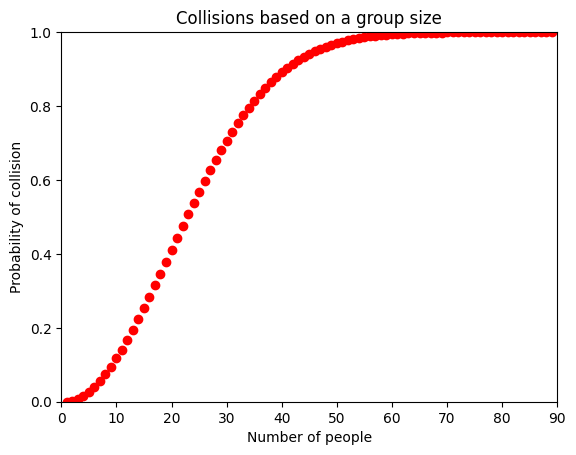

In [16]:
def prop(n):
    if n == 1:
        return 1
    else:
        return (365 - n + 1) / 365 * prop(n - 1)


X = []
Y = []
for i in range(1, 90):
    X.append(i)
    Y.append(1 - prop(i))

plt.title("Collisions based on a group size")
plt.scatter(X, Y, color='red')
plt.xlabel("Number of people")
plt.ylabel("Probability of collision")
plt.axis([0, 90, 0, 1])
plt.show()


## Application of The Birthday Paradox

</p>A hash function is any function that can be used to map data of arbitrary size to fixed-size values. 

In [3]:
digest=hashlib.md5("Hello World".encode()).hexdigest() #encode~ converts the string into bytes to be acceptable by hash function.
print (digest)

b10a8db164e0754105b7a99be72e3fe5


In [8]:
print ("String Length of Digest:",len(digest))
print ("Length of hash value:",len(digest)*4)  # Each hexadecimal digit represents four bits

String Length of Digest: 32
Length of hash value: 128


Here distinct values will be 2^128 = 340282366920938463463374607431768211456. We need a simpler has function....

In [4]:
def md5_mod(value):
    digest=hashlib.md5(value).hexdigest()
    return digest[:2]

print (md5_mod("Hello World".encode()))

b1


<p>For the above function the number of distinct values will be 2^8 = 256 </p>

In [47]:
collision_count = 0
Lookup_table = {}
for i in range(256):
    random_bit = os.urandom(16)
    digest = md5_mod(random_bit)
    if digest in Lookup_table:
        collision_count += 1
    else:
        Lookup_table[digest] = True
print("Collisions are", collision_count)


Collisions are 99


To approximate the number of times the experiment needs to be run (ie number of people) required for a 1/2 chance of collision, we can use square approximation

In [49]:
math.sqrt(256)

16.0

In [54]:
collision_count = 0
Lookup_table = {}
for i in range(16):
    random_bit = os.urandom(16)
    digest = md5_mod(random_bit)
    if digest in Lookup_table:
        collision_count += 1
    else:
        Lookup_table[digest] = True
print("Collisions are", collision_count)

Collisions are 2
